# TP3 - Exercice 2 - Régression linéaire et polynomiale

(Question 1)

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import queue

# Permet l'affichage des graphiques

%matplotlib inline

(Question 2 & 3)

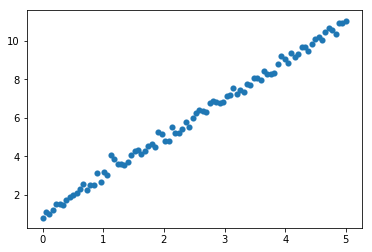

In [2]:
points_x = np.linspace(0, 5, 90)
points_y = [(2 * points_x[i] + 1) + 0.2 * np.random.randn(1) for i in range(len(points_x))]
plt.scatter(points_x, points_y, linewidths=0.1)
plt.show()

(Question 4 & 5)

In [3]:
# Découpage déterministe

X_train = []
y_train = []
X_test  = []
y_test  = []

for i in range(len(points_x)):
    if i % 3 == 0:
        X_train.append([points_x[i]])
        y_train.append(points_y[i])
    else:
        X_test.append([points_x[i]])
        y_test.append(points_y[i])

X_train_with_one = np.transpose(np.concatenate((np.array(X_train), np.vstack(np.ones(len(X_train)))), axis=1))
xxt = np.dot(X_train_with_one, np.transpose(X_train_with_one))
xxt_inv = np.linalg.inv(xxt)

xy = np.dot(X_train_with_one, y_train)
theta = np.dot(xxt_inv, xy)

print(theta)

[[ 2.00945806]
 [ 0.96052999]]


(Question 6)

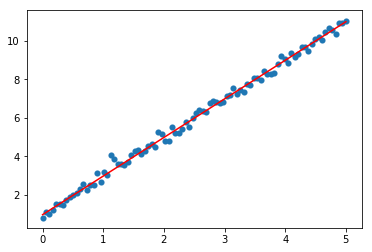

In [4]:
plt.scatter(points_x, points_y, linewidths=0.1)

line_x = [0, 5]
line_y = [theta[1][0], theta[0][0]*5 + theta[1][0]]

plt.plot(line_x, line_y, c='red')
plt.show()

(Question 7 & 8)

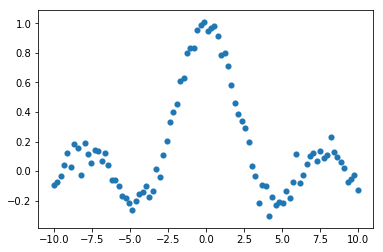

In [5]:
# Fonction sin(x)/x
def f_sin(x):
    return np.sin(x)/x

points_x_sin = np.linspace(-10, 10, 90)
points_y_sin = [f_sin(points_x_sin[i]) + 0.05 * np.random.randn(1) for i in range(len(points_x_sin))]

plt.scatter(points_x_sin, points_y_sin, linewidths=0.1)
plt.show()

(Question 9)

In [6]:
# Découpage déterministe

X_train_sin = []
y_train_sin = []
X_test_sin  = []
y_test_sin  = []

for i in range(len(points_x_sin)):
    if i % 3 == 0:
        X_train_sin.append([points_x_sin[i]])
        y_train_sin.append(points_y_sin[i])
    else:
        X_test_sin.append([points_x_sin[i]])
        y_test_sin.append(points_y_sin[i])

(Question 10)

In [7]:
# Fonction pour renvoyer z
def z(x, degree):
    new_x = [[] for _ in range(len(x))]
    for i in range(len(new_x)):
        for d in range(degree+1):
            new_x[i].append(np.power(x[i][0], d))

    return np.flip(new_x, axis=1)

def polyreg(x, y, degree):
    X_train_with_one = np.transpose(z(x, degree))
    xxt = np.dot(X_train_with_one, np.transpose(X_train_with_one))
    xxt_inv = np.linalg.inv(xxt)

    xy = np.dot(X_train_with_one, y)
    theta = np.dot(xxt_inv, xy)
    return theta

theta = polyreg(X_train_sin, y_train_sin, 8)

def poly8(x, theta, degree):
    zx = z([[x]], degree)
    return np.dot(np.transpose(theta), np.transpose(zx))[0][0]

(Question 11)

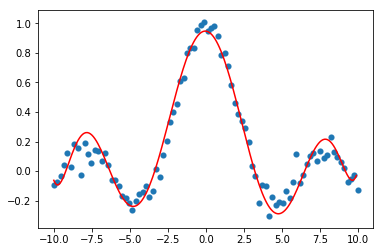

In [8]:
plt.scatter(points_x_sin, points_y_sin, linewidths=0.1)
x_f = [i for i in np.arange(-10, 10, 0.1)]
y_f = [poly8(i, theta, 8) for i in x_f]

plt.plot(x_f, y_f, c='red')
plt.show()

(Question 12)

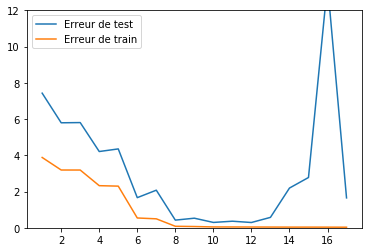

In [9]:
def compute_error(x_data, y_data, theta, degree):
    # Calcul sur le jeu x
    error = 0

    for i in range(len(x_data)):
        y = poly8(x_data[i], theta, degree)
        error += (y_data[i] - y) * (y_data[i] - y)

    return error

error_test = []
error_train = []
error_x = [i for i in range(1, 18)]
for d in error_x:
    theta = polyreg(X_train_sin, y_train_sin, d)
    error_test.append(compute_error(X_test_sin, y_test_sin, theta, d))
    error_train.append(compute_error(X_train_sin, y_train_sin, theta, d))
    
plt.plot(error_x, error_test, label="Erreur de test")
plt.plot(error_x, error_train, label="Erreur de train")
plt.ylim([0, 12])
plt.legend()
plt.show()

D'après ce graphique, le degré optimale est 10 ou 11 pour ce jeu de donnée.
(Question 13)

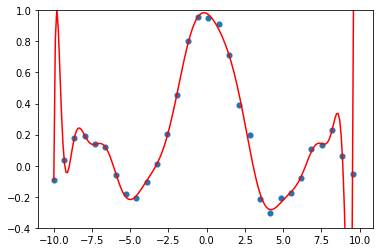

In [10]:
theta = polyreg(X_train_sin, y_train_sin, 19)

plt.scatter(X_train_sin, y_train_sin, linewidths=0.1)
x_f = [i for i in np.arange(-10, 10, 0.1)]
y_f = [poly8(i, theta, 19) for i in x_f]

plt.plot(x_f, y_f, c='red')
plt.ylim([-0.4, 1])
plt.show()

Ce résultat illustre bien le phénomène d'overfitting puisqu'on voit que la fonction qu'on trouve donne de très bon résultat sur les points de l'ensemble de train, mais créer une solution qui arrivera très mal à généraliser la fonction. On trouvera en théorie une erreur assez grande sur le jeu de test.